In [47]:
import rasterio
import rasterio.mask
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely import geometry
import matplotlib.pyplot as plt
from rasterio.plot import show
import contextily as cx

## Data

In [48]:
path = '../raw_data/berlin_urban_class.json'

In [49]:
urban_class_bln = gpd.read_file(path)

In [50]:
urban_class_bln.head()

veg  road  water  resi  non_resi  \
0    0     0      0     0         0   
1    0     0      0     0         0   
2    0     0      0     0         0   
3    0     0      0     0         0   
4    0     0      0     0         0   

                                            geometry  
0  POLYGON ((13.64525 52.33830, 13.64672 52.33825...  
1  POLYGON ((13.64672 52.33825, 13.64818 52.33821...  
2  POLYGON ((13.64818 52.33821, 13.64965 52.33816...  
3  POLYGON ((13.64965 52.33816, 13.65111 52.33812...  
4  POLYGON ((13.64239 52.33928, 13.64386 52.33924...

In [51]:
urban_class_bln.describe()

veg          road         water          resi      non_resi
count  90387.000000  90387.000000  90387.000000  90387.000000  90387.000000
mean      88.611924      2.541737      0.292918     62.456360     11.399670
std       80.678255      8.711027      2.947904     58.682025     37.463301
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.000000
50%       82.000000      0.000000      0.000000     57.000000      0.000000
75%      156.000000      0.000000      0.000000    111.000000      0.000000
max      312.000000     94.000000    104.000000    316.000000    435.000000

In [52]:
urban_class_bln.veg.unique()

array([  0,  48,  88,  24, 165, 181,  19, 195, 204, 162,   5,  84, 102,
       180, 163,  54,   6,  39,  21,  20, 107, 150,   1,  71,  94, 139,
        78,  18,  72,  67, 207, 186,  46,  97, 177, 122,  75,   9,  56,
       135, 159,   3,  42,  15,  81,  12,  98,  87,   4,  69,  51,  86,
        90,  80, 114, 123, 129, 138, 126, 144,  47,  30,  40,  26,  33,
       113,  36, 152, 189,  93, 147, 201, 124,  66,  27,  17,  22, 128,
       192,  60, 222, 167, 206, 156,  82,  11,  99, 153, 142, 148, 216,
       228, 246, 158, 254, 215, 127,  76, 131,  43, 136,  63, 109, 132,
       225, 243, 171, 179, 198,  52,  45, 117,  95, 108, 151, 174, 182,
       183, 168, 149, 125, 120, 146, 105,  58, 110,  62, 197,  23, 210,
        41, 145, 193, 213, 212, 205, 170, 157,  79,  68, 111, 141, 202,
       173, 255, 188, 116,  65, 119, 115,  77, 185,  14, 137,  44, 100,
        35, 155, 242, 175, 199, 143, 112, 187,   2, 164, 160, 104, 154,
       166, 133,  59, 208,  89,   8,  74,  57, 200, 134, 103, 16

In [53]:
urban_class_bln.shape

(90387, 6)

<Axes: >

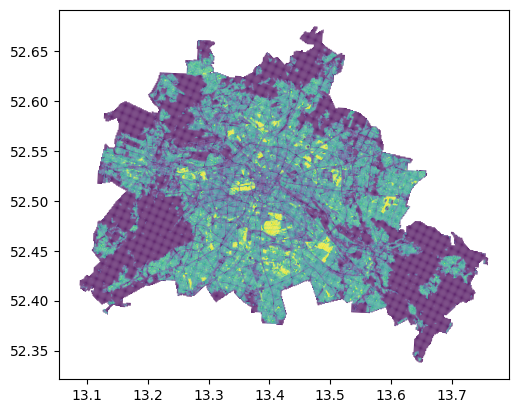

In [54]:
urban_class_bln.plot(column='veg')

In [55]:
path2 = '../raw_data/Berlin_Landuse.gpkg'

In [56]:
land_use_bln_raw = gpd.read_file(path2)

In [57]:
land_use_bln_raw

country fua_name fua_code code_2018  \
0           DE   Berlin  DE001L1     11100   
1           DE   Berlin  DE001L1     11240   
2           DE   Berlin  DE001L1     11210   
3           DE   Berlin  DE001L1     12100   
4           DE   Berlin  DE001L1     11100   
...        ...      ...      ...       ...   
120823      DE   Berlin  DE001L1     50000   
120824      DE   Berlin  DE001L1     50000   
120825      DE   Berlin  DE001L1     50000   
120826      DE   Berlin  DE001L1     50000   
120827      DE   Berlin  DE001L1     11210   

                                               class_2018 prod_date  \
0                  Continuous urban fabric (S.L. : > 80%)   2020-10   
1       Discontinuous very low density urban fabric (S...   2020-10   
2       Discontinuous dense urban fabric (S.L. : 50% -...   2020-10   
3       Industrial, commercial, public, military and p...   2020-10   
4                  Continuous urban fabric (S.L. : > 80%)   2020-10   
...                                                   ...       ...   
120823                                              Water   2020-10   
120824                                              Water   2020-10   
120825                                              Water   2020-10   
120826                                              Water   2020-10   
120827  Discontinuous dense urban fabric (S.L. : 50% -...   2020-10   

            identifier    perimeter          area  comment  Pop2018  \
0          281-DE001L1   169.628613   1549.101213      NaN        4   
1        50285-DE001L1   418.916845  10405.048666      NaN      153   
2        12889-DE001L1   379.392590   7083.683610      NaN       65   
3        61446-DE001L1   433.426566  10985.316622      NaN        1   
4         2773-DE001L1  1762.596181  37719.329088      NaN      308   
...                ...          ...           ...      ...      ...   
120823  120635-DE001L1  1377.813478  33656.802817      NaN        0   
120824  120726-DE001L1  1416.393924  74470.833292      NaN        0   
120825  120734-DE001L1   533.073685   8431.840582      NaN        0   
120826  120815-DE001L1  1562.138404  31561.965461      NaN        0   
120827   11803-DE001L1  1065.253905  41132.552491      NaN      423   

                                                 geometry  
0       MULTIPOLYGON (((4594946.630 3211089.861, 45948...  
1       MULTIPOLYGON (((4567351.284 3247553.321, 45672...  
2       MULTIPOLYGON (((4551825.997 3252118.948, 45518...  
3       MULTIPOLYGON (((4561345.202 3263503.216, 45612...  
4       MULTIPOLYGON (((4525644.165 3267406.378, 45257...  
...                                                   ...  
120823  MULTIPOLYGON (((4554000.000 3266302.790, 45539...  
120824  MULTIPOLYGON (((4563000.000 3269318.088, 45630...  
120825  MULTIPOLYGON (((4555000.000 3269445.344, 45550...  
120826  MULTIPOLYGON (((4549000.000 3271579.678, 45489...  
120827  MULTIPOLYGON (((4567654.760 3248000.000, 45676...  

[120828 rows x 12 columns]

In [58]:
germany = gpd.read_file('../raw_data/germany.json')

In [59]:
berlin = germany[germany['NAME_3']=='Berlin'][['NAME_3','geometry']]
berlin

NAME_3                                           geometry
2028  Berlin  MULTIPOLYGON (((13.50020 52.61380, 13.49680 52...

## Testing Functions

In [69]:
from construct_grid import make_grid_centroid, create_centroids_gdf, join_landuse_centroid, points_to_squares

In [70]:
def join_landuse_city(city_gdf, landuse_gdf):
    # Join the landuse feature with the city polygon
    landuse_joined = gpd.sjoin(landuse_gdf, city_gdf.to_crs(epsg=3035), predicate='within')

    return landuse_joined

In [71]:
centroids_bln = create_centroids_gdf(berlin,100)

In [72]:
centroids_bln.shape

(167440, 1)

## Checking Landuse map for missing values

In [73]:
berlin_landuse_processed = join_landuse_city(berlin,land_use_bln_raw)

(3260000.0, 3285000.0)

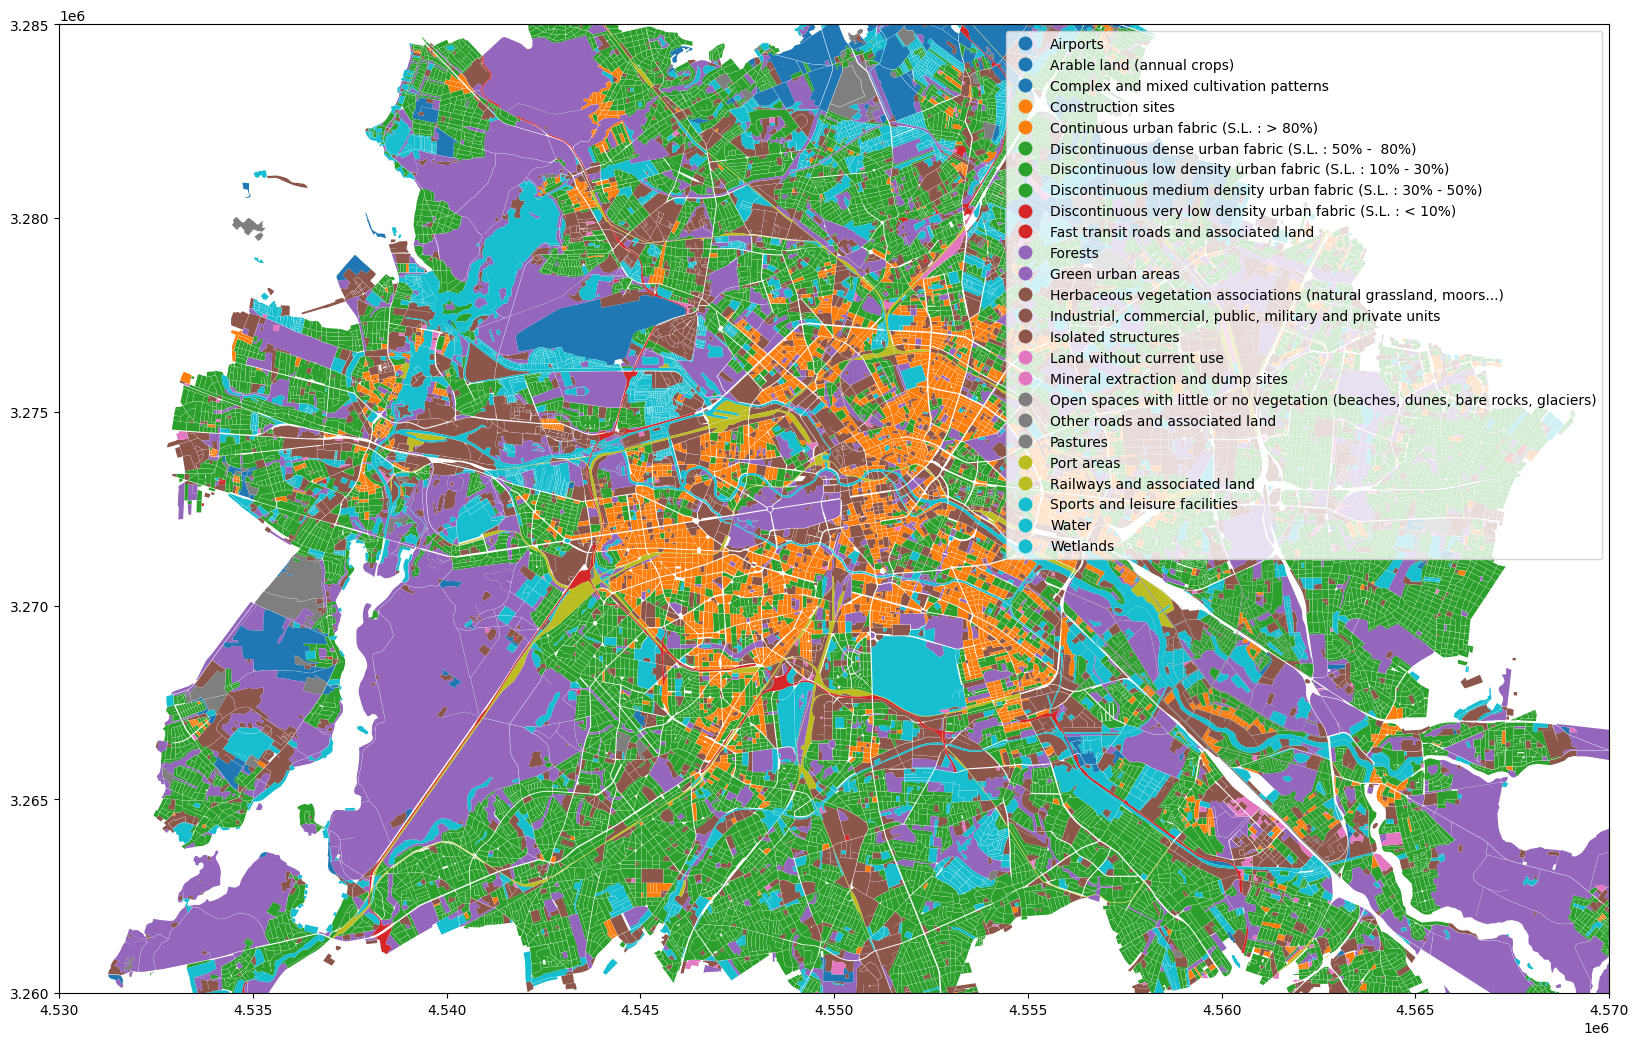

In [99]:
berlin_landuse_processed.plot(column='class_2018', figsize=(20,20), legend=True)
plt.xlim(4530000,4570000)
plt.ylim(3260000,3285000)

In [97]:
berlin_landuse_processed['code_2018'].value_counts()

11210    5989
12100    3836
11220    3489
11100    2615
14200    1994
14100    1373
11230     582
31000     264
50000     246
21000     180
13400     174
32000     165
23000     115
12230      81
12220      58
12210      46
13300      36
11240      31
11300      22
40000      19
12300      15
13100      15
12400       1
24000       1
33000       1
Name: code_2018, dtype: int64

/opt/homebrew/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

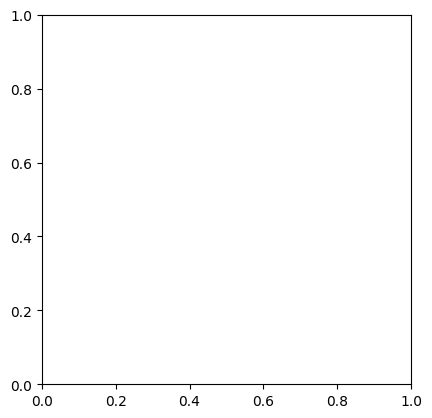

In [94]:
filtered_gdf = berlin_landuse_processed.loc[berlin_landuse_processed['class_2018'] == 12220]
#berlin_landuse_processed.plot(column='class_2018', figsize=(20,20))
#plt.xlim(4530000,4570000)
#plt.ylim(3260000,3285000)
filtered_gdf.plot()

(3260000.0, 3285000.0)

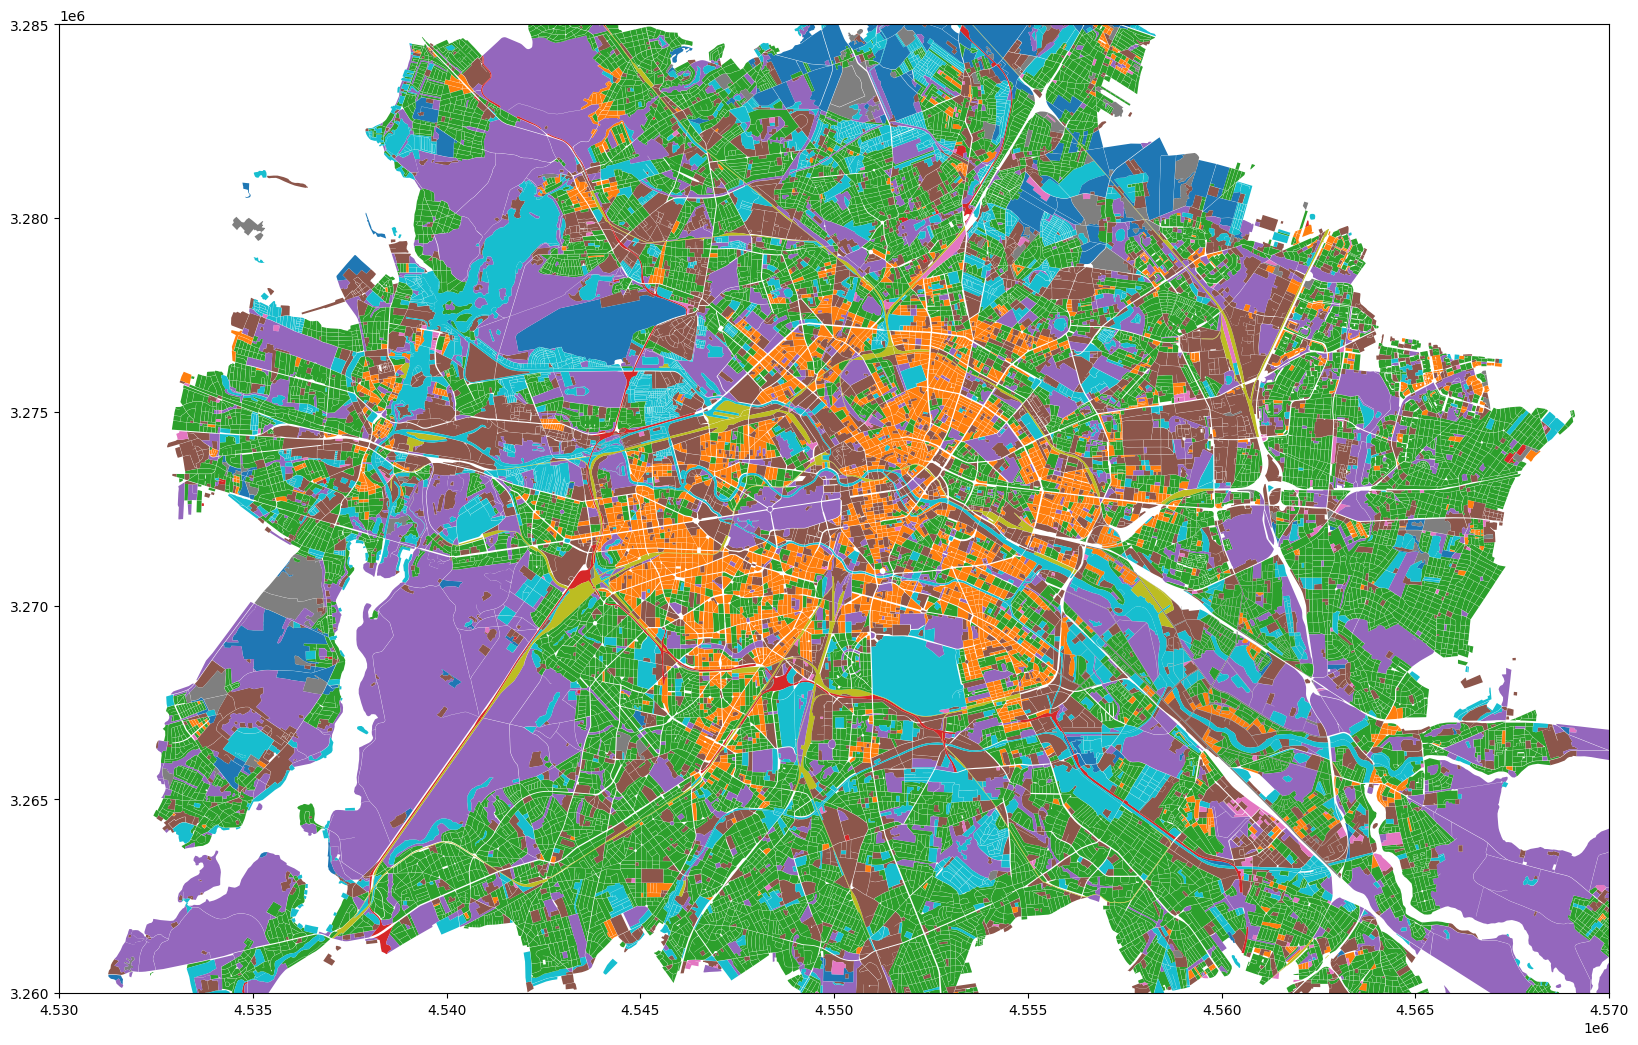

In [65]:
# Filter rows where the value in the 'column_name' column is greater than 10
filtered_gdf = gdf.loc[gdf['class_2018'] == 10]

# Create a new matplotlib figure and axes object
fig, ax = plt.subplots()

# Plot the unfiltered GeoDataFrame on the axes
gdf.plot(ax=ax, color='gray')

# Plot the filtered GeoDataFrame on the axes, on top of the unfiltered data
filtered_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()

In [29]:
berlin_landuse_processed

code_2018                                         class_2018  \
3          12100  Industrial, commercial, public, military and p...   
5          11210  Discontinuous dense urban fabric (S.L. : 50% -...   
7          11100             Continuous urban fabric (S.L. : > 80%)   
8          11210  Discontinuous dense urban fabric (S.L. : 50% -...   
9          11220  Discontinuous medium density urban fabric (S.L...   
...          ...                                                ...   
120818     50000                                              Water   
120823     50000                                              Water   
120824     50000                                              Water   
120825     50000                                              Water   
120826     50000                                              Water   

            identifier           area  \
3        61446-DE001L1   10985.316622   
5        20379-DE001L1   16720.852696   
7         4353-DE001L1    8012.692144   
8        22430-DE001L1   63899.313644   
9        40273-DE001L1    7699.119177   
...                ...            ...   
120818  120355-DE001L1  119950.289663   
120823  120635-DE001L1   33656.802817   
120824  120726-DE001L1   74470.833292   
120825  120734-DE001L1    8431.840582   
120826  120815-DE001L1   31561.965461   

                                                 geometry  
3       MULTIPOLYGON (((4561345.202 3263503.216, 45612...  
5       MULTIPOLYGON (((4566641.335 3272907.827, 45667...  
7       MULTIPOLYGON (((4551966.734 3274827.224, 45519...  
8       MULTIPOLYGON (((4555874.300 3274773.241, 45558...  
9       MULTIPOLYGON (((4550522.420 3281991.800, 45505...  
...                                                   ...  
120818  MULTIPOLYGON (((4543000.000 3276041.054, 45429...  
120823  MULTIPOLYGON (((4554000.000 3266302.790, 45539...  
120824  MULTIPOLYGON (((4563000.000 3269318.088, 45630...  
120825  MULTIPOLYGON (((4555000.000 3269445.344, 45550...  
120826  MULTIPOLYGON (((4549000.000 3271579.678, 45489...  

[21348 rows x 5 columns]

In [52]:
import geopandas as gpd

def join_landuse_centroid(centroid_gdf, landuse_gdf):
    # Rename index columns to avoid conflicts
    centroid_gdf = centroid_gdf.rename_axis('centroid_index').reset_index()
    landuse_gdf = landuse_gdf.rename_axis('landuse_index').reset_index()

    # Match the input centroid point with the land use data using a left join
    landuse_centroid = gpd.sjoin(centroid_gdf, landuse_gdf, how='left')

    return landuse_centroid

In [58]:
#no na values in the raw land use geopandas df
land_use_bln_raw.code_2018.isna().sum()

0

In [75]:
berlin_landuse_processed.drop(columns='index_right', inplace=True)

In [76]:
berlin_landuse_processed.head()

country fua_name fua_code code_2018  \
3      DE   Berlin  DE001L1     12100   
5      DE   Berlin  DE001L1     11210   
7      DE   Berlin  DE001L1     11100   
8      DE   Berlin  DE001L1     11210   
9      DE   Berlin  DE001L1     11220   

                                          class_2018 prod_date     identifier  \
3  Industrial, commercial, public, military and p...   2020-10  61446-DE001L1   
5  Discontinuous dense urban fabric (S.L. : 50% -...   2020-10  20379-DE001L1   
7             Continuous urban fabric (S.L. : > 80%)   2020-10   4353-DE001L1   
8  Discontinuous dense urban fabric (S.L. : 50% -...   2020-10  22430-DE001L1   
9  Discontinuous medium density urban fabric (S.L...   2020-10  40273-DE001L1   

     perimeter          area  comment  Pop2018  \
3   433.426566  10985.316622      NaN        1   
5   521.510538  16720.852696      NaN       56   
7   363.090949   8012.692144      NaN      206   
8  3012.162620  63899.313644      NaN     1177   
9   379.159849   7699.119177      NaN       36   

                                            geometry  NAME_3  
3  MULTIPOLYGON (((4561345.202 3263503.216, 45612...  Berlin  
5  MULTIPOLYGON (((4566641.335 3272907.827, 45667...  Berlin  
7  MULTIPOLYGON (((4551966.734 3274827.224, 45519...  Berlin  
8  MULTIPOLYGON (((4555874.300 3274773.241, 45558...  Berlin  
9  MULTIPOLYGON (((4550522.420 3281991.800, 45505...  Berlin

In [77]:
berlin_lu_centroids = join_landuse_centroid(centroids_bln,berlin_landuse_processed)

In [81]:
berlin_lu_centroids['class_2018'].isna().sum()

0

In [80]:
berlin_lu_centroids

geometry  index__right country fua_name  \
1293    POINT (4569389.698 3254110.913)         48579      DE   Berlin   
1748    POINT (4569389.698 3254210.913)         48579      DE   Berlin   
1750    POINT (4569589.698 3254210.913)         48579      DE   Berlin   
2202    POINT (4569289.698 3254310.913)         48579      DE   Berlin   
2203    POINT (4569389.698 3254310.913)         48579      DE   Berlin   
...                                 ...           ...     ...      ...   
164958  POINT (4555889.698 3290110.913)        114623      DE   Berlin   
165413  POINT (4555889.698 3290210.913)         97971      DE   Berlin   
165868  POINT (4555889.698 3290310.913)         97971      DE   Berlin   
166323  POINT (4555889.698 3290410.913)         97971      DE   Berlin   
166325  POINT (4556089.698 3290410.913)        114614      DE   Berlin   

       fua_code code_2018                                         class_2018  \
1293    DE001L1     11220  Discontinuous medium density urban fabric (S.L...   
1748    DE001L1     11220  Discontinuous medium density urban fabric (S.L...   
1750    DE001L1     11220  Discontinuous medium density urban fabric (S.L...   
2202    DE001L1     11220  Discontinuous medium density urban fabric (S.L...   
2203    DE001L1     11220  Discontinuous medium density urban fabric (S.L...   
...         ...       ...                                                ...   
164958  DE001L1     32000  Herbaceous vegetation associations (natural gr...   
165413  DE001L1     23000                                           Pastures   
165868  DE001L1     23000                                           Pastures   
166323  DE001L1     23000                                           Pastures   
166325  DE001L1     32000  Herbaceous vegetation associations (natural gr...   

       prod_date      identifier    perimeter          area  comment  Pop2018  \
1293     2020-10   34221-DE001L1  3313.034002  95051.225653      NaN      128   
1748     2020-10   34221-DE001L1  3313.034002  95051.225653      NaN      128   
1750     2020-10   34221-DE001L1  3313.034002  95051.225653      NaN      128   
2202     2020-10   34221-DE001L1  3313.034002  95051.225653      NaN      128   
2203     2020-10   34221-DE001L1  3313.034002  95051.225653      NaN      128   
...          ...             ...          ...           ...      ...      ...   
164958   2020-10  117918-DE001L1   623.717563  13737.505410      NaN        0   
165413   2020-10   99918-DE001L1   929.009376  25948.699349      NaN        0   
165868   2020-10   99918-DE001L1   929.009376  25948.699349      NaN        0   
166323   2020-10   99918-DE001L1   929.009376  25948.699349      NaN        0   
166325   2020-10  117925-DE001L1   477.837265  11678.106351      NaN        0   

        NAME_3  
1293    Berlin  
1748    Berlin  
1750    Berlin  
2202    Berlin  
2203    Berlin  
...        ...  
164958  Berlin  
165413  Berlin  
165868  Berlin  
166323  Berlin  
166325  Berlin  

[71481 rows x 14 columns]

(3265000.0, 3285000.0)

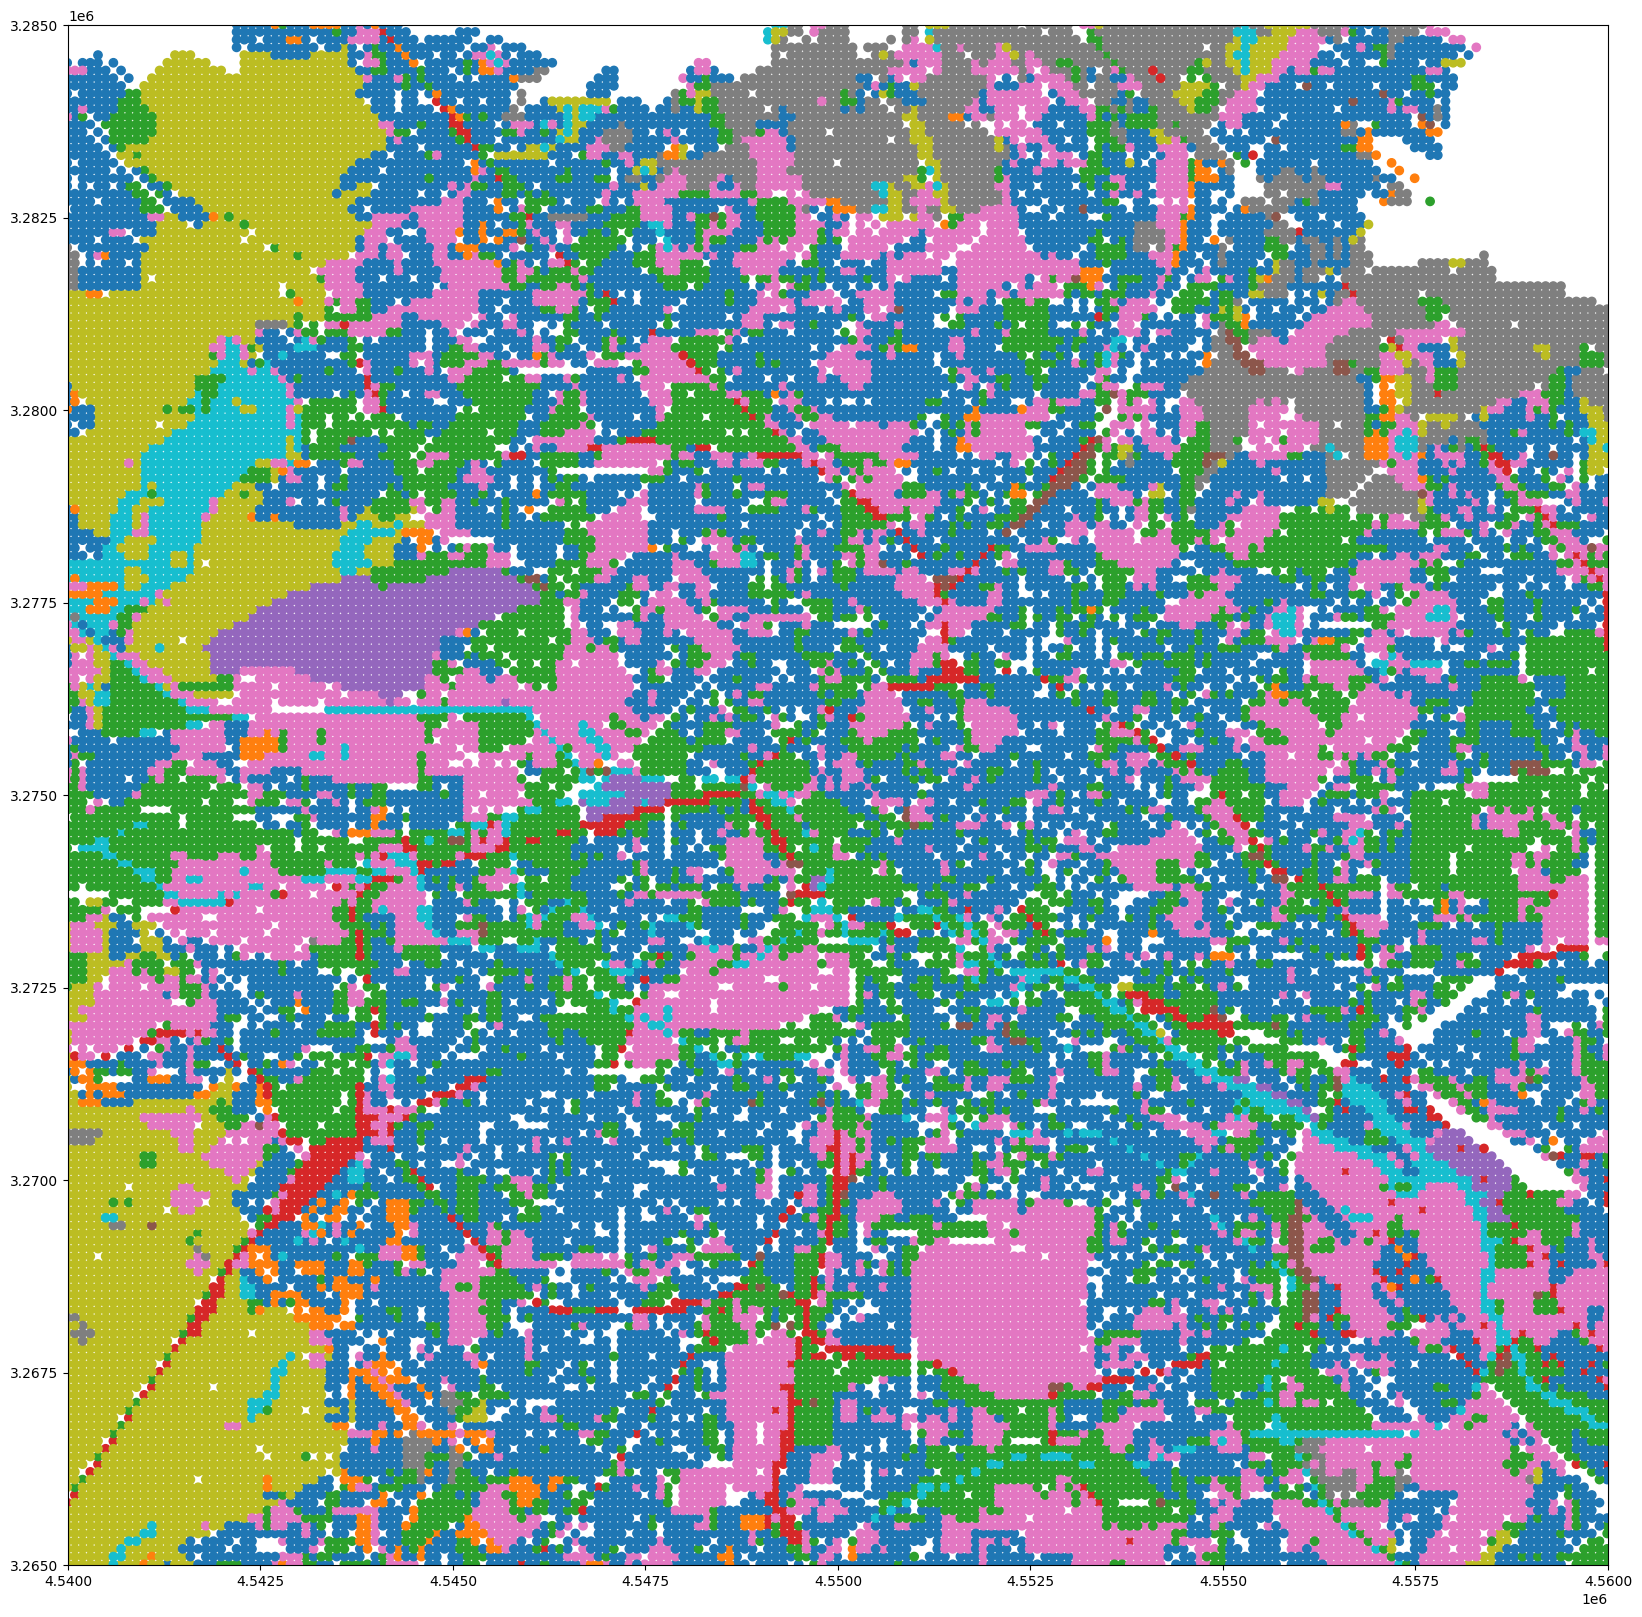

In [89]:
berlin_lu_centroids.plot(column='code_2018', figsize=(20,20))
plt.xlim(4540000,4560000)
plt.ylim(3265000,3285000)

In [59]:
berlin_lu_centroids['class_2018'] = berlin_lu_centroids['class_2018'].fillna(12220)

In [ ]:
berlin_lu_centroids.plot(column='code_2018', figsize=(20,20), markersize=0.5)

<Axes: >

In [12]:
#good function but too slow for my kernel
"""def join_landuse(city_gdf, landuse_gdf, cell_size):
    # Create a GeoDataFrame of centroids for the input city polygon
    centroids_gdf = create_centroids_gdf(city_gdf, cell_size)

    # Match the centroid points with the land use data
    landuse_centroid = gpd.sjoin(centroids_gdf, landuse_gdf, lsuffix='_left', rsuffix='_right')

    return landuse_centroid"""


"def join_landuse(city_gdf, landuse_gdf, cell_size):\n    # Create a GeoDataFrame of centroids for the input city polygon\n    centroids_gdf = create_centroids_gdf(city_gdf, cell_size)\n\n    # Match the centroid points with the land use data\n    landuse_centroid = gpd.sjoin(centroids_gdf, landuse_gdf, lsuffix='_left', rsuffix='_right')\n\n    return landuse_centroid"

In [ ]:
#join_landuse_centroid(berlin,land_use_bln,1000)

In [133]:
berlin_landuse_processed.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

In [157]:
squared_polygons_lu_bln.shape

(71481, 6)

In [156]:
berlin_landuse_processed.shape

(21348, 5)

In [155]:
berlin_lu_centroids.shape

(71481, 6)

In [30]:
berlin_lu_centroids.shape

(71481, 15)

In [ ]:
berlin_lu_centroids.plot(column='code_2018', figsize=(20,20), markersize=0.5)

<Axes: >

In [32]:
berlin_lu_centroids[['geometry']]

geometry
1293    POINT (4569389.698 3254110.913)
1748    POINT (4569389.698 3254210.913)
1750    POINT (4569589.698 3254210.913)
2202    POINT (4569289.698 3254310.913)
2203    POINT (4569389.698 3254310.913)
...                                 ...
164958  POINT (4555889.698 3290110.913)
165413  POINT (4555889.698 3290210.913)
165868  POINT (4555889.698 3290310.913)
166323  POINT (4555889.698 3290410.913)
166325  POINT (4556089.698 3290410.913)

[71481 rows x 1 columns]

In [61]:
squared_polygons_lu_bln = points_to_squares(berlin_lu_centroids,100)

<Axes: >

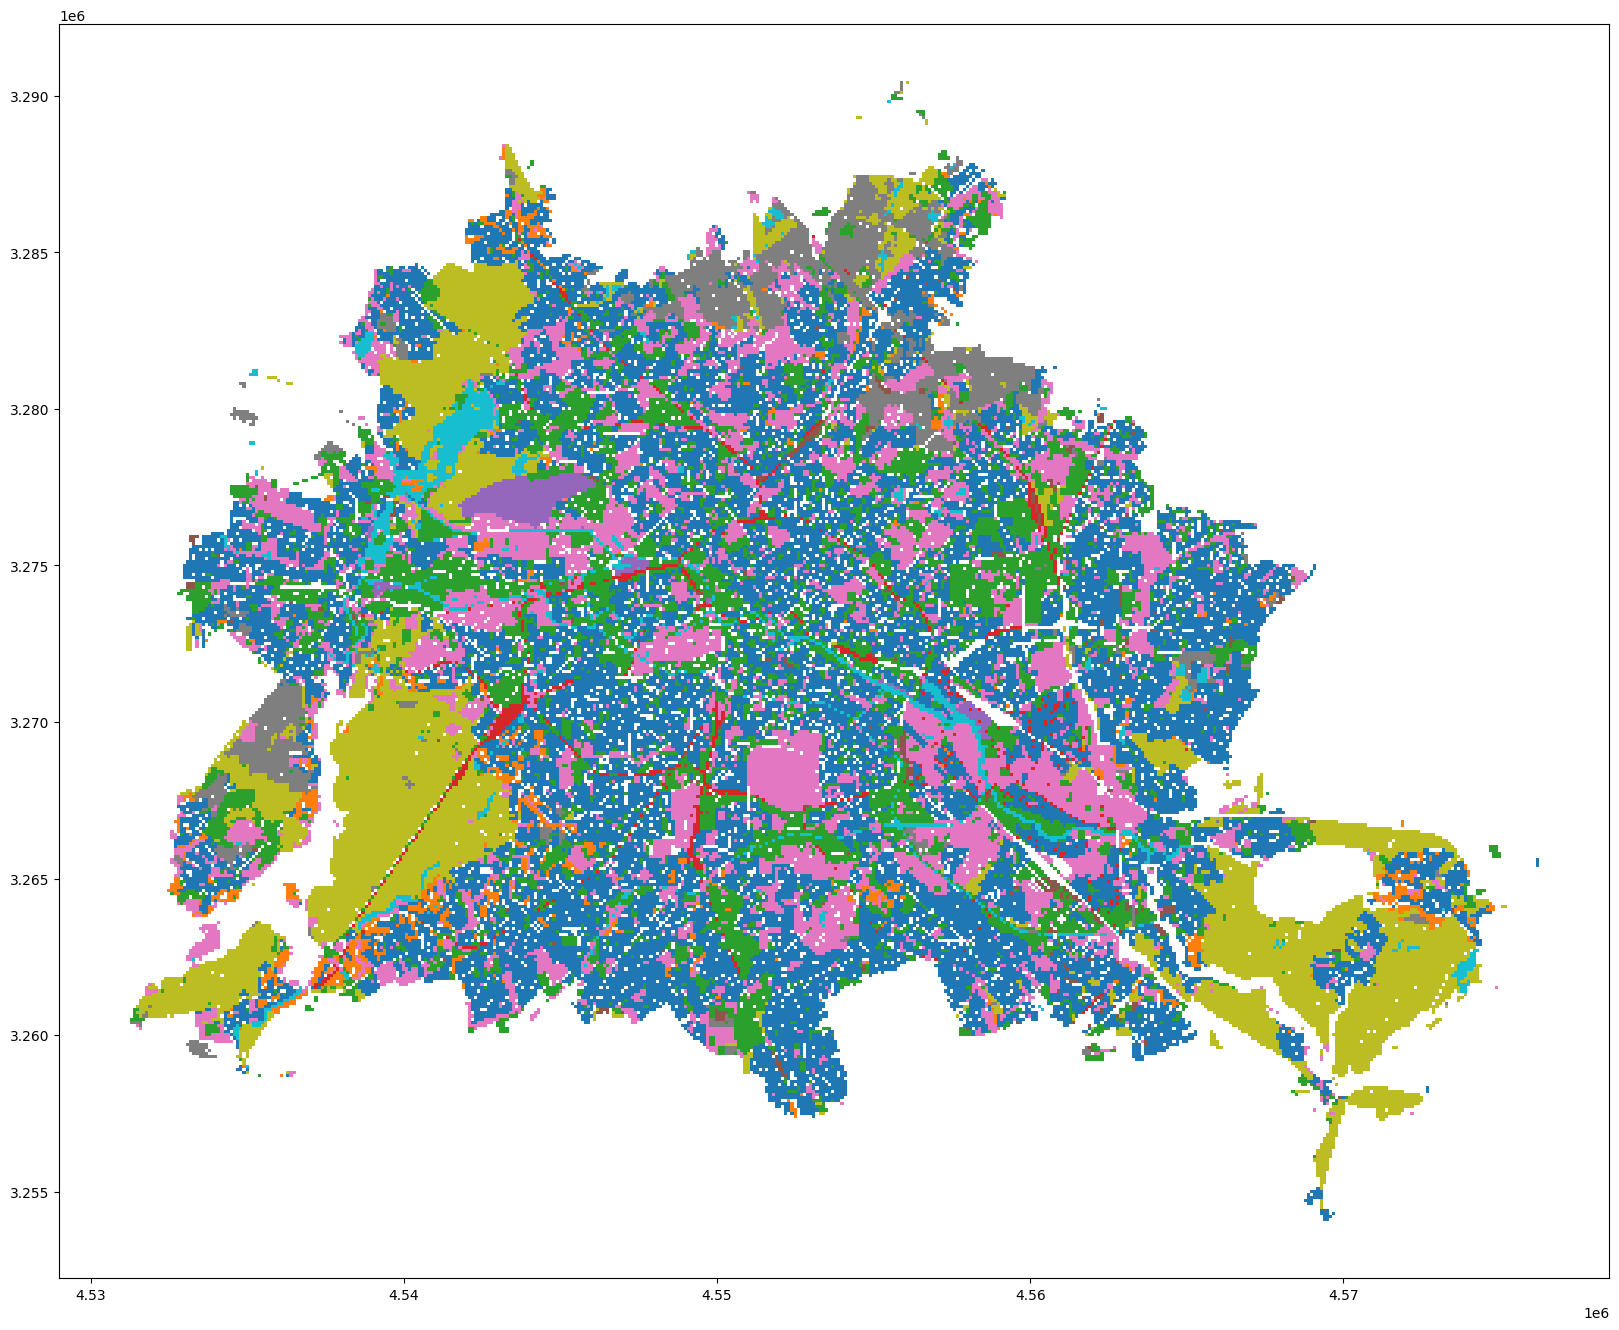

In [62]:
squared_polygons_lu_bln.plot(column='code_2018', figsize=(20,20), markersize=0.1)
#plt.xlim(4550000,4560000)
#plt.ylim(3275000,3280000)

In [167]:
berlin_lu_centroids.shape

(71481, 6)

In [165]:
squared_polygons_lu_bln.shape

(71481, 6)

In [ ]:
squared_polygons_lu_bln.head()

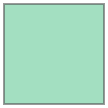

In [151]:
squared_polygons_lu_bln.geometry.iloc[0]

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load data

# Create plot
fig, ax = plt.subplots(figsize=(10,10))
squared_polygons_lu_bln.plot(ax=ax)

# Zoom in on a specific region
ax.set_xlim(3275, 3290)
ax.set_ylim(455, 457)

# Show plot
plt.show()


## Displaying Maps

### Squared polygons

<Axes: >

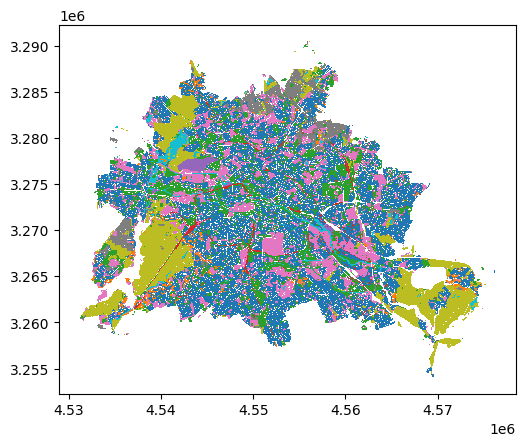

In [44]:
squared_polygons_lu_bln.plot(column='code_2018')

### Urban classification

In [ ]:
urban_class_bln.head()

In [62]:
urban_class_bln.shape

(71481, 8)

#### Vegetation

In [ ]:
urban_class_bln.plot(column='veg', figsize=(20,20))

<Axes: >

#### Road

<Axes: >

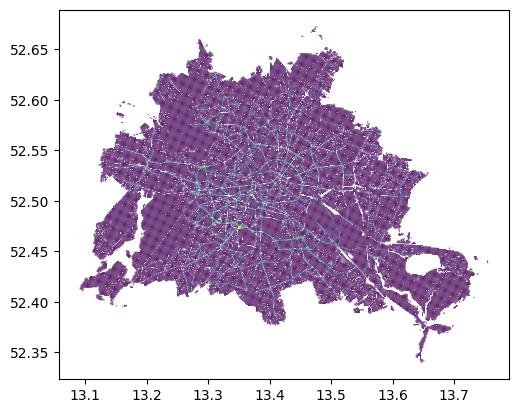

In [55]:
urban_class_bln.plot(column='road')

#### Water

<Axes: >

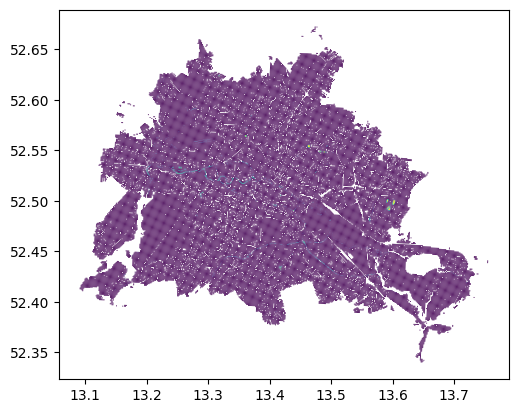

In [58]:
urban_class_bln.plot(column='water')

#### Residential

<Axes: >

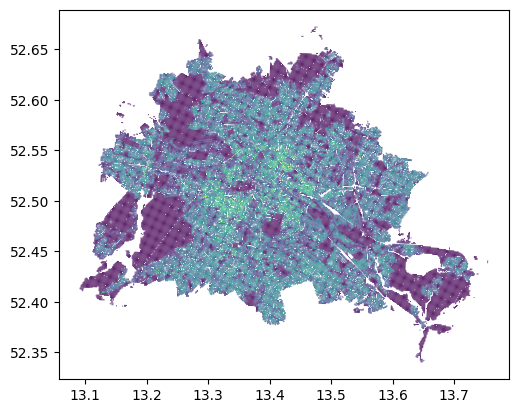

In [57]:
urban_class_bln.plot(column='resi')

#### Non-Residential

<Axes: >

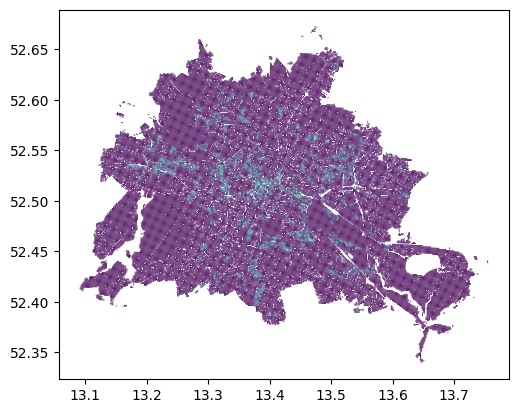

In [60]:
urban_class_bln.plot(column='non_resi')

## Feature join

<Axes: >

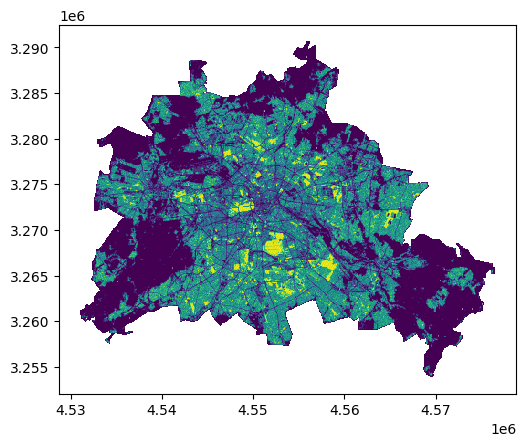

In [125]:
urban_class_bln.to_crs(epsg=3035).plot(column='veg')

In [92]:
berlin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [152]:
land_use_bln_raw.shape

(120828, 12)

In [96]:
urban_class_bln.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [153]:
squared_polygons_lu_bln.shape

(71481, 6)

In [91]:
urban_class_bln

veg  road  water  resi  non_resi  \
0        0     0      0     0         0   
1        0     0      0     0         0   
2        0     0      0     0         0   
3        0     0      0     0         0   
4        0     0      0     0         0   
...    ...   ...    ...   ...       ...   
90382    0     0      0     0         0   
90383    0     0      0     0         0   
90384    0     0      0     0         0   
90385    0     0      0     0         0   
90386    0     0      0     0         0   

                                                geometry  
0      POLYGON ((13.64525 52.33830, 13.64672 52.33825...  
1      POLYGON ((13.64672 52.33825, 13.64818 52.33821...  
2      POLYGON ((13.64818 52.33821, 13.64965 52.33816...  
3      POLYGON ((13.64965 52.33816, 13.65111 52.33812...  
4      POLYGON ((13.64239 52.33928, 13.64386 52.33924...  
...                                                  ...  
90382  POLYGON ((13.47756 52.67256, 13.47904 52.67252...  
90383  POLYGON ((13.47320 52.67359, 13.47468 52.67354...  
90384  POLYGON ((13.47468 52.67354, 13.47616 52.67350...  
90385  POLYGON ((13.47616 52.67350, 13.47763 52.67346...  
90386  POLYGON ((13.47763 52.67346, 13.47911 52.67342...  

[90387 rows x 6 columns]

In [66]:
urban_class_bln

veg  road  water  resi  non_resi  \
0        0     0      0     0         0   
1        0     0      0     0         0   
2        0     0      0     0         0   
3        0     0      0     0         0   
4        0     0      0     0         0   
...    ...   ...    ...   ...       ...   
90382    0     0      0     0         0   
90383    0     0      0     0         0   
90384    0     0      0     0         0   
90385    0     0      0     0         0   
90386    0     0      0     0         0   

                                                geometry  
0      POLYGON ((13.64525 52.33830, 13.64672 52.33825...  
1      POLYGON ((13.64672 52.33825, 13.64818 52.33821...  
2      POLYGON ((13.64818 52.33821, 13.64965 52.33816...  
3      POLYGON ((13.64965 52.33816, 13.65111 52.33812...  
4      POLYGON ((13.64239 52.33928, 13.64386 52.33924...  
...                                                  ...  
90382  POLYGON ((13.47756 52.67256, 13.47904 52.67252...  
90383  POLYGON ((13.47320 52.67359, 13.47468 52.67354...  
90384  POLYGON ((13.47468 52.67354, 13.47616 52.67350...  
90385  POLYGON ((13.47616 52.67350, 13.47763 52.67346...  
90386  POLYGON ((13.47763 52.67346, 13.47911 52.67342...  

[90387 rows x 6 columns]

In [65]:
squared_polygons_lu_bln

centroid_index  index_right  landuse_index country fua_name fua_code  \
0                    0          NaN            NaN     NaN      NaN      NaN   
1                    1          NaN            NaN     NaN      NaN      NaN   
2                    2          NaN            NaN     NaN      NaN      NaN   
3                    3          NaN            NaN     NaN      NaN      NaN   
4                    4          NaN            NaN     NaN      NaN      NaN   
...                ...          ...            ...     ...      ...      ...   
167435          167435          NaN            NaN     NaN      NaN      NaN   
167436          167436          NaN            NaN     NaN      NaN      NaN   
167437          167437          NaN            NaN     NaN      NaN      NaN   
167438          167438          NaN            NaN     NaN      NaN      NaN   
167439          167439          NaN            NaN     NaN      NaN      NaN   

       code_2018 class_2018 prod_date identifier  perimeter  area  comment  \
0            NaN      12220       NaN        NaN        NaN   NaN      NaN   
1            NaN      12220       NaN        NaN        NaN   NaN      NaN   
2            NaN      12220       NaN        NaN        NaN   NaN      NaN   
3            NaN      12220       NaN        NaN        NaN   NaN      NaN   
4            NaN      12220       NaN        NaN        NaN   NaN      NaN   
...          ...        ...       ...        ...        ...   ...      ...   
167435       NaN      12220       NaN        NaN        NaN   NaN      NaN   
167436       NaN      12220       NaN        NaN        NaN   NaN      NaN   
167437       NaN      12220       NaN        NaN        NaN   NaN      NaN   
167438       NaN      12220       NaN        NaN        NaN   NaN      NaN   
167439       NaN      12220       NaN        NaN        NaN   NaN      NaN   

        Pop2018 NAME_3                                           geometry  
0           NaN    NaN  POLYGON ((4531039.698 3253860.913, 4531039.698...  
1           NaN    NaN  POLYGON ((4531139.698 3253860.913, 4531139.698...  
2           NaN    NaN  POLYGON ((4531239.698 3253860.913, 4531239.698...  
3           NaN    NaN  POLYGON ((4531339.698 3253860.913, 4531339.698...  
4           NaN    NaN  POLYGON ((4531439.698 3253860.913, 4531439.698...  
...         ...    ...                                                ...  
167435      NaN    NaN  POLYGON ((4576039.698 3290560.913, 4576039.698...  
167436      NaN    NaN  POLYGON ((4576139.698 3290560.913, 4576139.698...  
167437      NaN    NaN  POLYGON ((4576239.698 3290560.913, 4576239.698...  
167438      NaN    NaN  POLYGON ((4576339.698 3290560.913, 4576339.698...  
167439      NaN    NaN  POLYGON ((4576439.698 3290560.913, 4576439.698...  

[167440 rows x 16 columns]

In [63]:
feature_join = gpd.sjoin(urban_class_bln.to_crs(epsg=3035), squared_polygons_lu_bln, op='intersects')

/Users/nico/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


ValueError: 'index_left' and 'index_right' cannot be names in the frames being joined

In [ ]:
feature_join_overlaps= gpd.sjoin(urban_class_bln.to_crs(epsg=3035), squared_polygons_lu_bln, op='overlaps')

In [ ]:
feature_join_overlaps.plot(column='veg')

/Users/nico/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/opt/homebrew/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

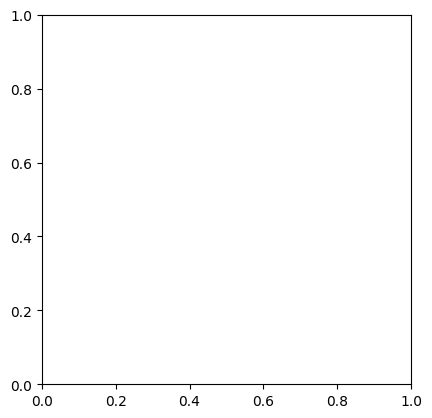

In [188]:
feature_join_touches = gpd.sjoin(urban_class_bln.to_crs(epsg=3035), squared_polygons_lu_bln, op='crosses')
feature_join_touches.plot()

In [181]:
feature_join.shape

(357346, 12)

In [ ]:
feature_join_duplic = feature_join.index.duplicated(keep=False)

In [180]:
feature_join_duplic.sum()

354176

<Axes: >

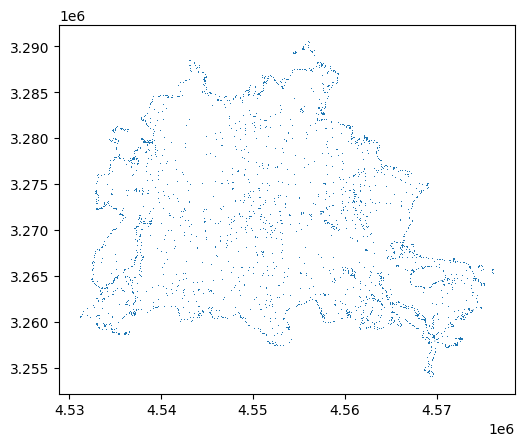

In [182]:
feature_join[~feature_join_duplic]

In [174]:
#feature_join.drop_duplicates(subset=feature_join.index.name)

veg  road  water  resi  non_resi  \
5        0     0      0     0         0   
6       48     0      2    10         0   
13      24     0      4     7         0   
14     165     0      0    30         0   
15     181     0      0    39         0   
...    ...   ...    ...   ...       ...   
90375    0     0      0     0         0   
90376    0     0      0     0         0   
90377    0     0      0     0         0   
90380    0     0      0     0         0   
90381    0     0      0     0         0   

                                                geometry  index_right  \
5      POLYGON ((4569239.698 3253960.908, 4569339.697...         1293   
6      POLYGON ((4569339.697 3253960.916, 4569439.697...         1293   
13     POLYGON ((4569239.697 3254060.909, 4569339.701...         1293   
14     POLYGON ((4569339.701 3254060.917, 4569439.699...         1293   
15     POLYGON ((4569439.699 3254060.916, 4569539.697...         1293   
...                                                  ...          ...   
90375  POLYGON ((4555939.698 3290360.914, 4556039.697...       166325   
90376  POLYGON ((4556039.697 3290360.918, 4556139.697...       166325   
90377  POLYGON ((4556139.697 3290360.912, 4556239.696...       166325   
90380  POLYGON ((4555939.701 3290460.918, 4556039.699...       166325   
90381  POLYGON ((4556039.699 3290460.910, 4556139.696...       166325   

       index__right code_2018  \
5             48579     11220   
6             48579     11220   
13            48579     11220   
14            48579     11220   
15            48579     11220   
...             ...       ...   
90375        114614     32000   
90376        114614     32000   
90377        114614     32000   
90380        114614     32000   
90381        114614     32000   

                                              class_2018      identifier  \
5      Discontinuous medium density urban fabric (S.L...   34221-DE001L1   
6      Discontinuous medium density urban fabric (S.L...   34221-DE001L1   
13     Discontinuous medium density urban fabric (S.L...   34221-DE001L1   
14     Discontinuous medium density urban fabric (S.L...   34221-DE001L1   
15     Discontinuous medium density urban fabric (S.L...   34221-DE001L1   
...                                                  ...             ...   
90375  Herbaceous vegetation associations (natural gr...  117925-DE001L1   
90376  Herbaceous vegetation associations (natural gr...  117925-DE001L1   
90377  Herbaceous vegetation associations (natural gr...  117925-DE001L1   
90380  Herbaceous vegetation associations (natural gr...  117925-DE001L1   
90381  Herbaceous vegetation associations (natural gr...  117925-DE001L1   

               area  
5      95051.225653  
6      95051.225653  
13     95051.225653  
14     95051.225653  
15     95051.225653  
...             ...  
90375  11678.106351  
90376  11678.106351  
90377  11678.106351  
90380  11678.106351  
90381  11678.106351  

[357346 rows x 12 columns]

In [ ]:
feature_join.plot(column='veg', figsize=(20,20), markersize=0.1)

<Axes: >

In [ ]:
feature_join.plot(column='veg', figsize=(20,20), markersize=0.1)
#plt.xlim(4550000,4560000)
#plt.ylim(3275000,3280000)

<Axes: >